In [5]:
import numpy as np
import matplotlib.pyplot as plt

#switching latex fonts
plt.rcParams.update({
    "text.usetex" : True,
    "font.family" : "serif",
    "font.serif" : "Computer Modern",
    "text.latex.preamble" : r'\usepackage{amsmath} \usepackage{mathtext} \usepackage[english, russian]{babel}'
})

## Fast Fourier Transformation implementation

In [15]:
def my_fft(y: np.array) -> np.array:
    n = len(y)
    if n == 1:
        return y.astype(np.complex64)
    assert(n%2 == 0)    # number of points has to be 2**N
    
    g = my_fft(y[::2])
    u = my_fft(y[1::2])
    res = np.zeros(n, np.complex64)
    phase_factor = np.exp(-2*np.pi*1j*np.arange(n//2)/n)
    res[:n//2] = g + u*phase_factor
    res[n//2:] = g - u*phase_factor
    return res

### tests

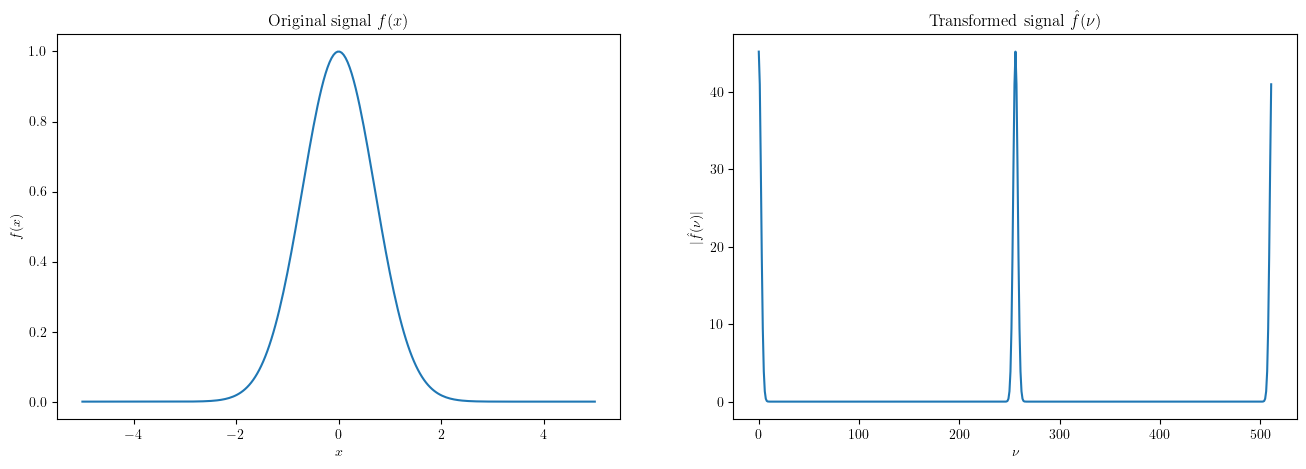

In [23]:
N = 2**8
x = np.linspace(-5, 5, N)
sigma = 1
x_0 = 0

y = np.exp(-((x-x_0)/sigma)**2)
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.title("Original signal $f(x)$")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.plot(x, y)

plt.subplot(1, 2, 2)

plt.title(r"Transformed signal $\hat{f}(\nu)$")
plt.xlabel(r"$\nu$")
plt.ylabel(r"$|\hat{f}(\nu)$|")
y_ = my_fft(y)
plt.plot(np.tile(np.abs(y_), 2))

None

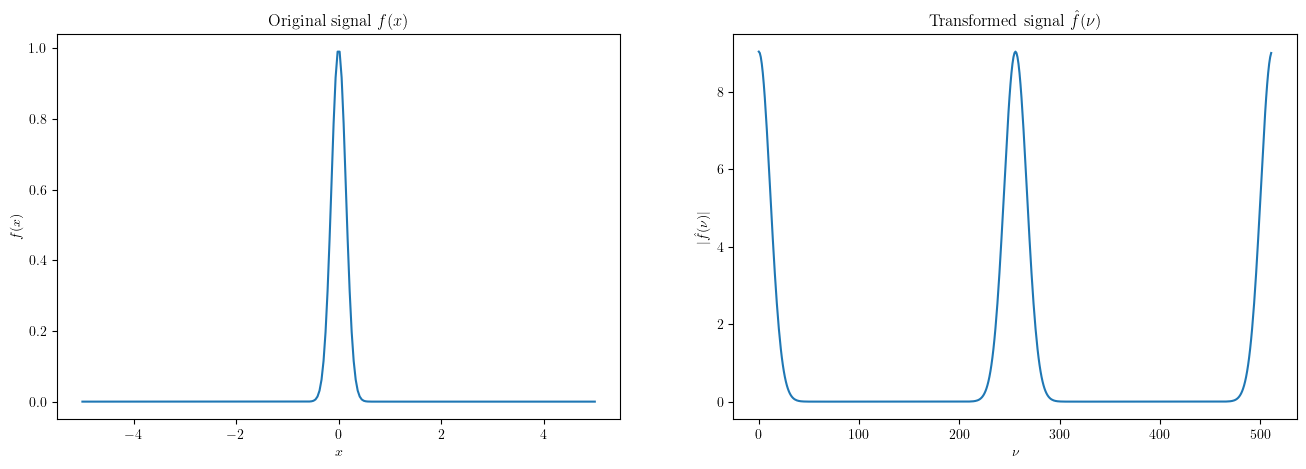

In [24]:
N = 2**8
x = np.linspace(-5, 5, N)
sigma = 0.2
x_0 = 0

y = np.exp(-((x-x_0)/sigma)**2)
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.title("Original signal $f(x)$")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.plot(x, y)

plt.subplot(1, 2, 2)

plt.title(r"Transformed signal $\hat{f}(\nu)$")
plt.xlabel(r"$\nu$")
plt.ylabel(r"$|\hat{f}(\nu)$|")
y_ = my_fft(y)
plt.plot(np.tile(np.abs(y_), 2))

None